#### 패키지 설치

In [2]:
import datetime as dt
import pandas as pd
import time
from pandas import read_excel, DataFrame

#### 데이터 가져오기

In [3]:
df = read_excel("https://data.hossam.kr/D01/covid19.xlsx")
df

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2023-05-31,6204277,5987.0,6492,31703511.0,24411.0,34784
1,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767
2,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
3,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
4,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,0,27.0,0.0,0
1208,2020-02-08,10,0.0,0,24.0,0.0,0
1209,2020-02-07,10,0.0,0,24.0,0.0,0
1210,2020-02-06,11,0.0,0,24.0,0.0,0


In [5]:
df.sort_values('서울시 기준일', ascending=True,inplace=True)

In [16]:
df["temp"]=range(len(df))
df.set_index("temp",inplace=True)
df.reindex(None) #???

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
temp,,,,,,,
0,2020-02-05,8,0.0,0,18.0,0.0,0
1,2020-02-06,11,0.0,0,24.0,0.0,0
2,2020-02-07,10,0.0,0,24.0,0.0,0
3,2020-02-08,10,0.0,0,24.0,0.0,0
4,2020-02-09,10,0.0,0,27.0,0.0,0
...,...,...,...,...,...,...,...
1207,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
1208,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
1209,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760


#### 날짜 데이터 처리
- 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.

In [28]:
# datetime형식을 문자로 바꿔주는 함수식
def transtime(x):
    return "".join(str(x).split(" ")[0].split("-"))

# 날짜 데이터 문자열 리스트로 만들기
date = list(map(transtime,df['서울시 기준일']))
date.sort()

# type(date[date.index('20200218')+7])

# 사용자로부터 문자열 입력(input값) -> +6D 까지의 날짜 범위 제시 (input.index + )
wanted_date = (input('날짜를 입력하세요: '))
weekData = []
for d in range(wanted_date,date[date.index(wanted_date)+7]):
    weekData.append(d)
weekData

str

### 시각화

- 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.

- 누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.

- seaborn을 활용하여 구현하세요.

In [13]:
# 패키지 설치
from matplotlib import pyplot as plt
import seaborn as sb

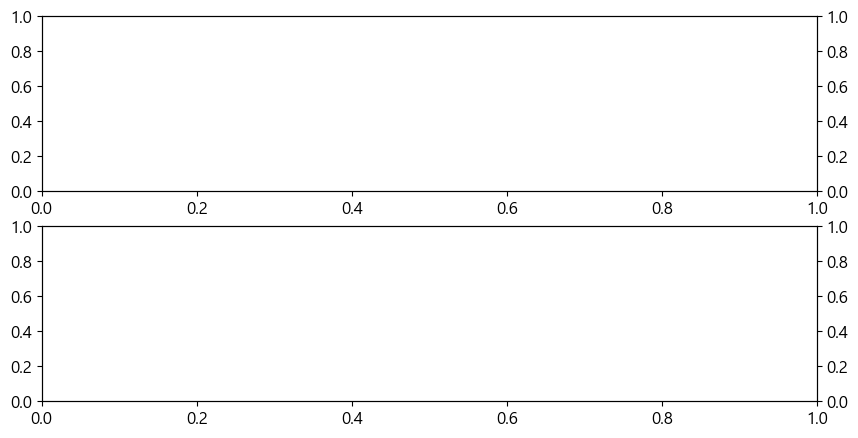

In [18]:
# 2행 1열 서브플롯 만들기
fig, (ax1, ax2) = plt.subplots(2,1) 
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# 그래프 전역 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.unicode_minus'] = False

- 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

In [ ]:
sb.barplot(data=df, x=weekData, y='서울 확진자', color='#ff6600', ax=ax1)
sb.lineplot(data=df, x=weekData, y='서울시 일일 확진', color='#0066ff', ax=ax3)

plt.title('서울시 누적.일일 확진자 변동 추이')
plt.legend()
plt.show()
plt.close()

- 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

In [ ]:
sb.barplot(data=df, x=weekData, y='전국 확진', color='#ff6600', ax=ax2)
sb.lineplot(data=df, x=weekData, y='전국 일일 확진', color='#0066ff', ax=ax4)

plt.title('서울시 누적.일일 확진자 변동 추이')
plt.legend()
plt.show()
plt.close()